In [5]:
import re
import csv
import glob
import pprint
import httplib2
from urllib.request import urlopen
from urllib.error import HTTPError
from bs4 import BeautifulSoup, SoupStrainer
import os
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import numpy as np


In [9]:
all_df = pd.read_csv('../datasets/all.csv')
pd.options.display.max_rows = 502


pd.options.display.max_rows = 502
#minor cleaning not caught by python script
all_df['channel'] = all_df['channel'].replace(['UCucot-Zp428OwkyRm2I7v2Q', 'UCroDJPcFCf6DBmHns6Xeb8g','UCNEwha2SIAz3NTtv9G0QPsg', 
                                                 'UCw95JvOs39snnMPkYs-6Sog'], 
                                                ['jamescharles', 'nymatang', 'alyssaforever', 'jasmeannnn'])
all_df


,channel,video_link,views,likes,dislikes,subscribers,type
0,itsalissaweekly,https://www.youtube.com/watch?v=il-e8KQRN0E,2157055,41347,1592,1214026,black
1,itsalissaweekly,https://www.youtube.com/watch?v=OoCWxK1153E,1895887,65912,916,1214026,black
2,itsalissaweekly,https://www.youtube.com/watch?v=lv04ZmFAz4k,1752150,78608,755,1214026,black
3,itsalissaweekly,https://www.youtube.com/watch?v=WBVvu7FYs8M,1560992,77342,567,1214026,black
4,itsalissaweekly,https://www.youtube.com/watch?v=FylmrOosU2Y,1318709,91039,399,1214026,black
5,itsalissaweekly,https://www.youtube.com/watch?v=VftRat7bG5A,1153538,47118,1592,1214026,black
6,itsalissaweekly,https://www.youtube.com/watch?v=shzzQxD53Tk,1135379,56432,504,1214026,black
7,itsalissaweekly,https://www.youtube.com/watch?v=WNs7fkbANM8,1046246,85770,1369,1214026,black
8,itsalissaweekly,https://www.youtube.com/watch?v=hp9OmSEQfPg,1016930,50571,676,1214026,black
9,itsalissaweekly,https://www.youtube.com/watch?v=V96EKKAe03c,1009549,24774,537,1214026,black


In [10]:
top_ten_views = all_df.sort_values(['views'], ascending=[False]).head(10)
top_ten_views


,channel,video_link,views,likes,dislikes,subscribers,type
210,nikkietutorials,https://www.youtube.com/watch?v=a4Ov8qvZ2_w,38574377,792407,8493,9604841,white
240,kandeejohnson,https://www.youtube.com/watch?v=S4cBipeLMiw,38481626,100437,12069,3961938,white
241,kandeejohnson,https://www.youtube.com/watch?v=H_IfRNp0ncU,32539712,257432,19159,3961938,white
211,nikkietutorials,https://www.youtube.com/watch?v=6aeE5LXujC4,27392964,692972,14987,9604841,white
80,jasmeannnn,https://www.youtube.com/watch?v=FaySCNI7VNg,26650985,432692,14738,1846289,black
350,CutiePieMarzia,https://www.youtube.com/watch?v=t1PJ60mrHQc,24130993,593328,9612,7265023,white
250,zoella280390,https://www.youtube.com/watch?v=b0vPzYhxy9c,22685043,537532,13589,12097835,white
251,zoella280390,https://www.youtube.com/watch?v=xC6VNJ6jNKc,19729652,727135,5285,12097835,white
212,nikkietutorials,https://www.youtube.com/watch?v=IxxI1X9CSEk,19398807,352124,9940,9604841,white
70,alyssaforever,https://www.youtube.com/watch?v=kx6nsbyPMj0,18006579,142060,6459,1249062,black


In [11]:
#LIKES ANALYSIS

top_ten_likes =  all_df.sort_values(['likes'], ascending=[False]).head(10)
top_ten_likes

,channel,video_link,views,likes,dislikes,subscribers,type
300,Missglamorazzi,https://www.youtube.com/watch?v=Eh7WRYXVh9M,17200587,804688,56009,3882997,white
210,nikkietutorials,https://www.youtube.com/watch?v=a4Ov8qvZ2_w,38574377,792407,8493,9604841,white
251,zoella280390,https://www.youtube.com/watch?v=xC6VNJ6jNKc,19729652,727135,5285,12097835,white
211,nikkietutorials,https://www.youtube.com/watch?v=6aeE5LXujC4,27392964,692972,14987,9604841,white
351,CutiePieMarzia,https://www.youtube.com/watch?v=k5tTRaq3E8I,17394389,659080,5594,7265023,white
350,CutiePieMarzia,https://www.youtube.com/watch?v=t1PJ60mrHQc,24130993,593328,9612,7265023,white
250,zoella280390,https://www.youtube.com/watch?v=b0vPzYhxy9c,22685043,537532,13589,12097835,white
252,zoella280390,https://www.youtube.com/watch?v=qx6fwery65M,16248294,517517,3973,12097835,white
215,nikkietutorials,https://www.youtube.com/watch?v=SOoauHBpcbU,11556302,502059,5452,9604841,white
254,zoella280390,https://www.youtube.com/watch?v=xZvRxVbxOKo,14286504,466651,6035,12097835,white


In [12]:
top_dislikes =  all_df.sort_values(['dislikes'], ascending=[False]).head(10)
top_dislikes

,channel,video_link,views,likes,dislikes,subscribers,type
201,Jaclynhill1,https://www.youtube.com/watch?v=GEhOZooB3bw,9413040,279965,58247,5045411,white
300,Missglamorazzi,https://www.youtube.com/watch?v=Eh7WRYXVh9M,17200587,804688,56009,3882997,white
190,jeffreestar,https://www.youtube.com/watch?v=yLBHooqolaw,12891149,108745,25240,6674419,white
360,grav3yardgirl,https://www.youtube.com/watch?v=t19JKxDXoFQ,17321201,143948,25193,8182540,white
198,jeffreestar,https://www.youtube.com/watch?v=4LwpGaDKmZ8,8983481,241390,22399,6674419,white
374,jamescharles,https://www.youtube.com/watch?v=EQzIbLeGnr0,5947791,211032,21633,3926651,white
375,jamescharles,https://www.youtube.com/watch?v=OqlQM7PKWQs,5790150,227498,19316,3926651,white
241,kandeejohnson,https://www.youtube.com/watch?v=H_IfRNp0ncU,32539712,257432,19159,3961938,white
193,jeffreestar,https://www.youtube.com/watch?v=Jp8N14rinb4,10504531,252660,18221,6674419,white
191,jeffreestar,https://www.youtube.com/watch?v=FB2UE_SWIXY,11380262,255703,16132,6674419,white


In [13]:
top_video_views = all_df.groupby('channel').head(1)
top_video_views.sort_values(['views'], ascending=[False]).head(10)


,channel,video_link,views,likes,dislikes,subscribers,type
210,nikkietutorials,https://www.youtube.com/watch?v=a4Ov8qvZ2_w,38574377,792407,8493,9604841,white
240,kandeejohnson,https://www.youtube.com/watch?v=S4cBipeLMiw,38481626,100437,12069,3961938,white
80,jasmeannnn,https://www.youtube.com/watch?v=FaySCNI7VNg,26650985,432692,14738,1846289,black
350,CutiePieMarzia,https://www.youtube.com/watch?v=t1PJ60mrHQc,24130993,593328,9612,7265023,white
250,zoella280390,https://www.youtube.com/watch?v=b0vPzYhxy9c,22685043,537532,13589,12097835,white
70,alyssaforever,https://www.youtube.com/watch?v=kx6nsbyPMj0,18006579,142060,6459,1249062,black
360,grav3yardgirl,https://www.youtube.com/watch?v=t19JKxDXoFQ,17321201,143948,25193,8182540,white
300,Missglamorazzi,https://www.youtube.com/watch?v=Eh7WRYXVh9M,17200587,804688,56009,3882997,white
200,Jaclynhill1,https://www.youtube.com/watch?v=Y4fur_12EEc,15508147,182725,4855,5045411,white
280,ChloeMorello,https://www.youtube.com/watch?v=1Rm6-xaNVJs,13747238,33233,6530,2477753,white


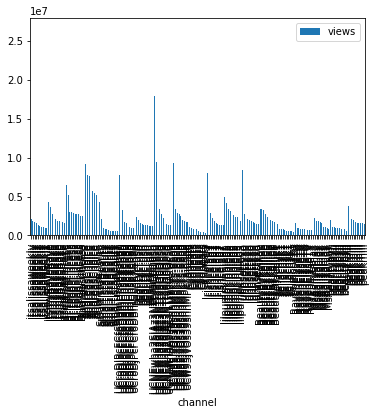

In [15]:
dk = pd.read_csv('../datasets/black.csv')
dk.plot.bar('channel', 'views')
plt.show()